<a href="https://colab.research.google.com/github/cmannnn/bank-promotional-campaigns/blob/main/Guided_Hackathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Marketing campaigns are characterized by focusing on the customer needs and their overall satisfaction. Nevertheless, there are different variables that determine whether a marketing campaign will be successful or not. Some important aspects of a marketing campaign are as follows: 

Segment of the Population: To which segment of the population is the marketing campaign going to address and why? This aspect of the marketing campaign is extremely important since it will tell to which part of the population should most likely receive the message of the marketing campaign. 

Distribution channel to reach the customer's place: Implementing the most effective strategy in order to get the most out of this marketing campaign. What segment of the population should we address? Which instrument should we use to get our message out? (Ex: Telephones, Radio, TV, Social Media Etc.) 

Promotional Strategy: This is the way the strategy is going to be implemented and how are potential clients going to be address. This should be the last part of the marketing campaign analysis since there has to be an in-depth analysis of previous campaigns (If possible) in order to learn from previous mistakes and to determine how to make the marketing campaign much more effective.

You are leading the marketing analytics team for a banking institution. There has been a revenue decline for the bank and they would like to know what actions to take. After investigation, it was found that the root cause is that their clients are not depositing as frequently as before. Term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can lend more and thus make more profits. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues.

You are provided a dataset containing details of marketing campaigns done via phone with various details for customers such as demographics, last campaign details etc. 

#Can you help the bank to predict accurately whether the customer will subscribe to the focus product for the campaign - Term Deposit after the campaign?

Data Description
Train Set

#Train set contains the data to be used for model building. It has the true labels for whether the customer subscribed for term deposit (1) or not (0) 

Sample Submission:

Format for making the submission for predictions on the test set

id: Unique id for each call

term_deposit_subscribed: whether term deposit was subscribed post call. (1/0)

In [27]:
# imports
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request

plt.style.use('fivethirtyeight')
%matplotlib inline

In [28]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [29]:
import os
os.chdir('/content/gdrive/MyDrive/Colabby Krabby Paddy')

In [ ]:
!ls

In [31]:
# train and test datasets
train = pd.read_csv('Train_eP48B9k.csv')
test = pd.read_csv('Test_jPKyvmK.csv')

In [32]:
# setting independent and dependent variable
id_col, target_col = train['id'], train['term_deposit_subscribed'] 

In [33]:
print(target_col.value_counts(normalize=True))

0    0.892754
1    0.107246
Name: term_deposit_subscribed, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


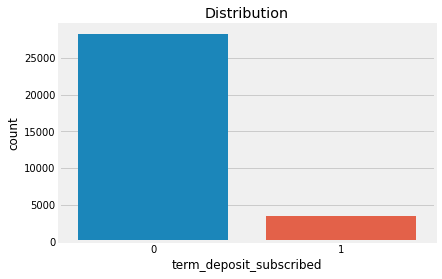

In [34]:
# target distribution countplot
_ = sns.countplot(target_col)
plt.title('Distribution')
plt.show()

In [35]:
# shape of both datasets
print('The test set has', test.shape[0], 'samples and', test.shape[1], 'variables')
print('The train set has', train.shape[0], 'samples and', test.shape[1], 'variables')

The test set has 13564 samples and 17 variables
The train set has 31647 samples and 17 variables


#Train Set EDA

In [ ]:
# test set EDA
print(train.head())

In [ ]:
# test set columns
print(train.columns)

In [ ]:
# test set describe
print(train.describe())

# Remove Train Null Values

In [ ]:
print(train.isnull().sum())

In [ ]:
# fixing 619 train customer_age datapoints
print(train.customer_age.describe())
train.customer_age.fillna(train.customer_age.mean(), inplace=True)
print('The \'customer_age\' train column has', train.customer_age.isnull().sum(), 'null values')

In [ ]:
# fixing 150 'marital' train columns null values
print('The \'marital\' test column has', train.marital.nunique(), 'unique values')
print(train.marital.describe())

# filling NAN values with forward fill
train.marital.ffill(inplace=True)
print('The \'marital\' test column has', train.marital.isnull().sum(), 'null values')

In [ ]:
# fixing 399 'balance' train column null values
print('The train \'balance\' column has', train['balance'].nunique(), 'unique values')
print(train['balance'].describe())

# filling NAN values with mean
train['balance'].fillna(train['balance'].mean(), inplace=True)
print('The train \'balance\' column has', train['balance'].isnull().sum(), 'null values')

In [ ]:
# fixing 149 'personal_loan' train column null values
print('The \'personal_loan\' column has', train['personal_loan'].nunique(), 'unique values')
print(train['personal_loan'].value_counts(normalize=True))

# filling NAN values with back fill
train['personal_loan'].fillna(method='bfill', inplace=True)
print('The \personal_loan\' column has', train['personal_loan'].isnull().sum(), 'null values')

In [44]:
# fixing 311 'last_contact_duration' train column null values
print('The \'last_contact_duration\' column has', train['last_contact_duration'].nunique(), 'unique values')
print(train['last_contact_duration'].describe())

# filling NAN values with mean
train['last_contact_duration'].fillna(train['last_contact_duration'].mean(), inplace=True)
print('The \'last_contact_duration\' column has', train['last_contact_duration'].isnull().sum(), 'null values')

The 'last_contact_duration' column has 1447 unique values
count    31336.000000
mean       256.184038
std        256.181479
min          0.000000
25%        103.000000
50%        179.000000
75%        315.250000
max       4900.000000
Name: last_contact_duration, dtype: float64
The 'last_contact_duration' column has 0 null values


In [45]:
# fixing 112 'num_contacts_in_campaign' train column null values
print('The \'num_contacts_in_campaign\' column has', train['num_contacts_in_campaign'].nunique(), 'unique values')
print(train['num_contacts_in_campaign'].describe())

# filling NAN values with bfill
train['num_contacts_in_campaign'].fillna(method='bfill', inplace=True)
print('The \'num_contacts_in_campaign\' has', train['num_contacts_in_campaign'].isnull().sum(), 'null values')

The 'num_contacts_in_campaign' column has 46 unique values
count    31535.000000
mean         2.776629
std          3.153293
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: num_contacts_in_campaign, dtype: float64
The 'num_contacts_in_campaign' has 0 null values


In [46]:
# fixing 25831 null values in the 'days_since_prev_campaign_contact' train column
# calculating % of null values
null_values = ((train['days_since_prev_campaign_contact'].isnull().sum() / len(train['days_since_prev_campaign_contact'])) * 100).round(2)

# because over 80% of values are null, not touching this column
print(f'{null_values} of the train \'days_since_prev_campaign_contact\' column are null')

81.62 of the train 'days_since_prev_campaign_contact' column are null


# Determining Categorical/Numerical Variables

In [47]:
# which columns in train set are uni/bi/multivariate/continuous?
print(train.dtypes)

id                                   object
customer_age                        float64
job_type                             object
marital                              object
education                            object
default                              object
balance                             float64
housing_loan                         object
personal_loan                        object
communication_type                   object
day_of_month                          int64
month                                object
last_contact_duration               float64
num_contacts_in_campaign            float64
days_since_prev_campaign_contact    float64
num_contacts_prev_campaign            int64
prev_campaign_outcome                object
term_deposit_subscribed               int64
dtype: object


In [48]:
# defining non target col features
features = [c for c in train.columns if c not in ['id', 'term_deposit_subscribed']]
print(features)

['customer_age', 'job_type', 'marital', 'education', 'default', 'balance', 'housing_loan', 'personal_loan', 'communication_type', 'day_of_month', 'month', 'last_contact_duration', 'num_contacts_in_campaign', 'days_since_prev_campaign_contact', 'num_contacts_prev_campaign', 'prev_campaign_outcome']


In [49]:
# defining categorical columns
categorical = train.select_dtypes(include=['object'])
cat_cols = [c for c in features if c in categorical]
print(f'The categorical columns in the trainng set are: {cat_cols}')

The categorical columns in the trainng set are: ['job_type', 'marital', 'education', 'default', 'housing_loan', 'personal_loan', 'communication_type', 'month', 'prev_campaign_outcome']


In [50]:
# defining numerical columns
numerical = [n for n in features if n not in cat_cols]
print(f'The numeric columns in the training set are: {numerical}')

The numeric columns in the training set are: ['customer_age', 'balance', 'day_of_month', 'last_contact_duration', 'num_contacts_in_campaign', 'days_since_prev_campaign_contact', 'num_contacts_prev_campaign']


# Training Set EDA Graphs!

Univariate Analysis

In [ ]:
# categorical pies
fig, axes = plt.subplots(5, 2, figsize=(15,19))
axes = [ax for axes_row in axes for ax in axes_row]

for i,c in enumerate(train[cat_cols]):
  _ = train[c].value_counts()[::-1].plot(kind='pie', ax=axes[i], autopct='%.0f%%', fontsize=12)
  _ = axes[i].set_ylabel(' ')
  _ = axes[i].set_title(label = c)

plt.tight_layout()
plt.show()

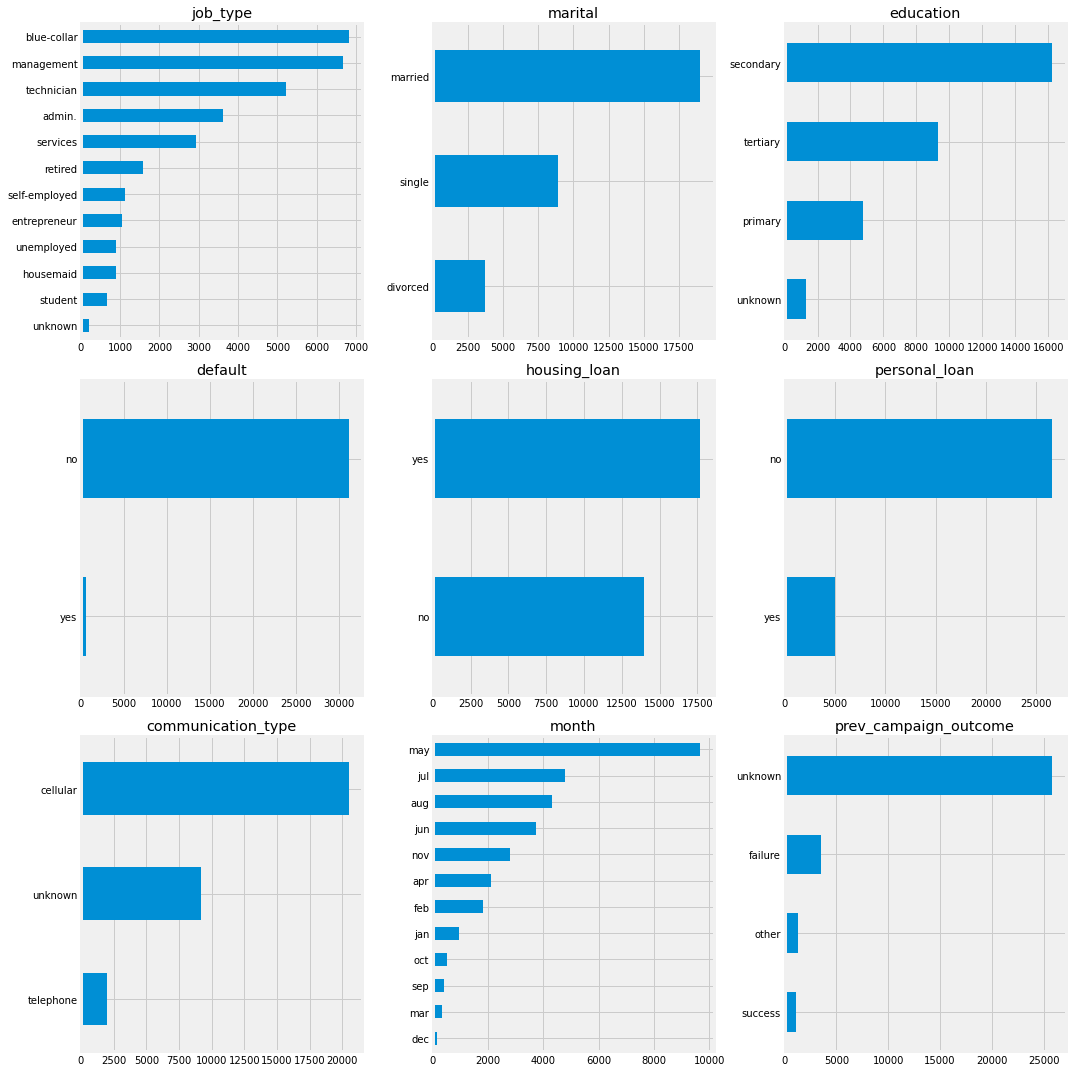

In [69]:
# categotical barcharts
fig, axes = plt.subplots(3,3, figsize=(15,15))
axes = [ax for axes_row in axes for ax in axes_row]

for i,c in enumerate(train[cat_cols]):
  _ = train[c].value_counts()[::-1].plot(kind='barh', title=c, fontsize=10, ax=axes[i])

plt.tight_layout()
plt.show()

Bivariate Analysis

In [91]:
# bivariate pivot_table
pivot = pd.pivot_table(train, values=target_col, index=['job_type'])

KeyError: ignored

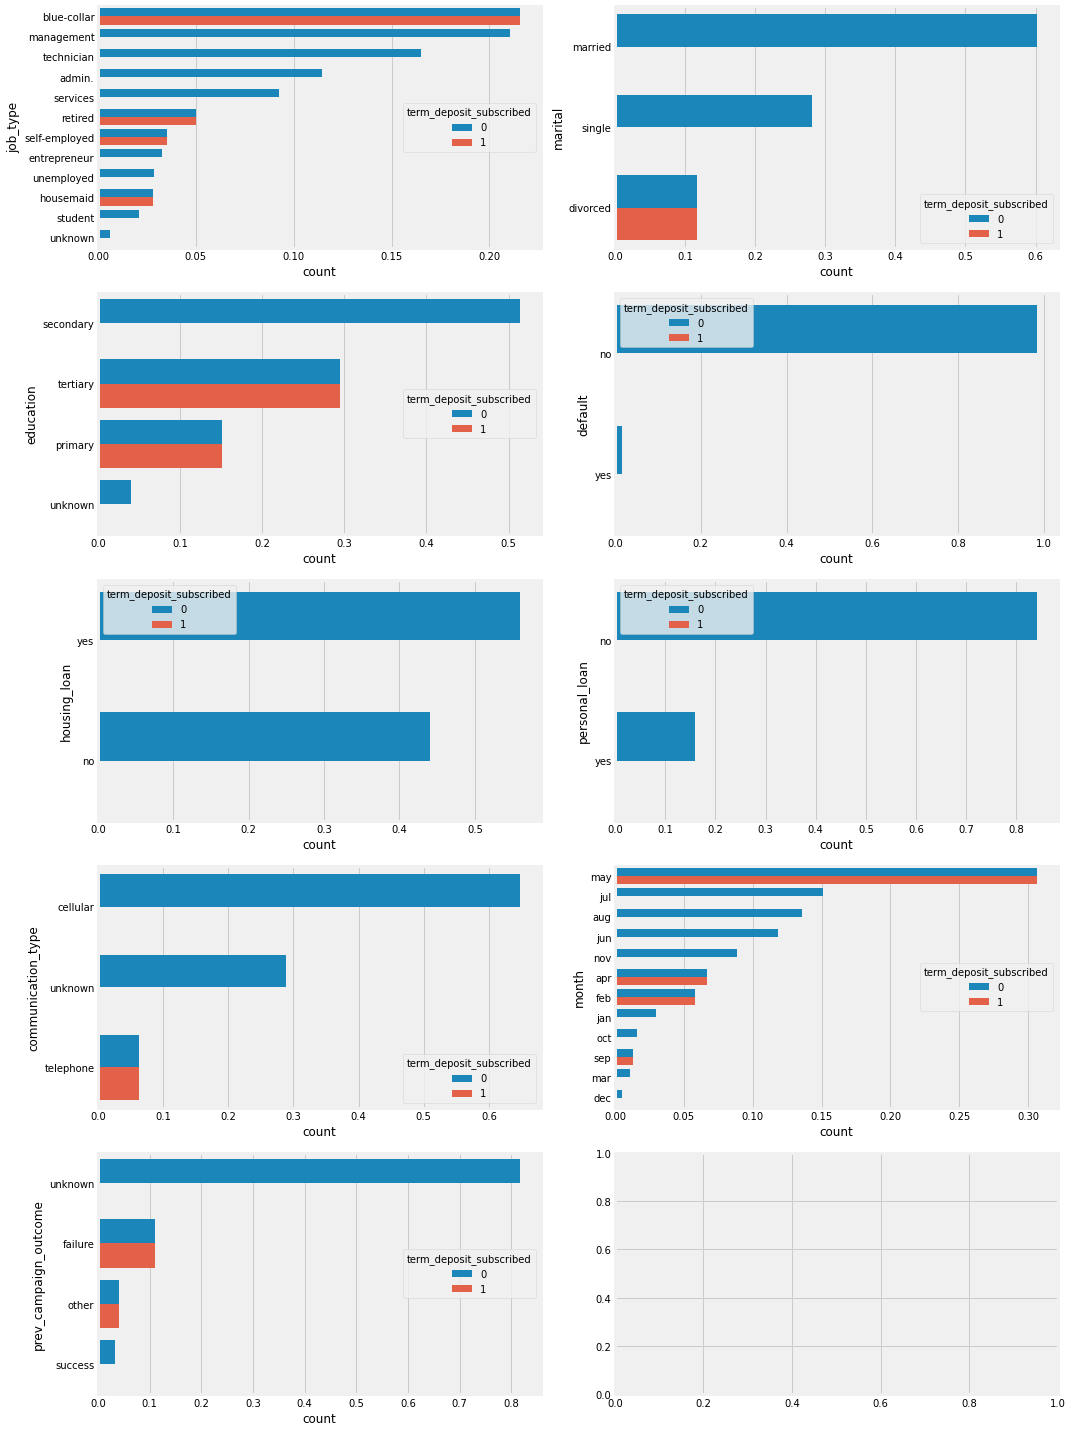

In [73]:
# bivariate barcharts
fig, axes = plt.subplots(5,2, figsize=(15, 20))
axes = [ax for ax_rows in axes for ax in ax_rows]

for i, c in enumerate(train[cat_cols]):
  v1 = train[c].value_counts(normalize=True).reset_index().rename({'index': c, c : 'count'}, axis=1)
  v2 = train[c].value_counts(normalize=True).reset_index().rename({'index': c, c : 'count'}, axis=1)
  df = pd.concat([v1, v2]).reset_index(drop=True)
  _ = sns.barplot(x = 'count', y = c, data = df, hue=target_col, ax=axes[i])

plt.tight_layout()
plt.show()